In [221]:
import plotly.graph_objects as go

In [230]:
from datetime import datetime 
from itertools import chain
from collections import Counter
import polars as pl
import seaborn as sns

Data source: https://www.kaggle.com/datasets/mcendeljeansylvestre/cyclists-bike-ride-dataset

## data prep

In [177]:
df2 = pl.read_csv('Downloads/Divvy_Trips_2019_Q2.csv')
df3 = pl.read_csv('Downloads/Divvy_Trips_2019_Q3.csv')
df4 = pl.read_csv('Downloads/Divvy_Trips_2019_Q4.csv')
df1 = pl.read_csv('Downloads/Divvy_Trips_2020_Q1.csv')

In [181]:
df1.head()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
str,str,str,str,str,i64,str,i64,f64,f64,f64,f64,str
"""EACB19130B0CDA…","""docked_bike""","""2020-01-21 20:…","""2020-01-21 20:…","""Western Ave & …",239,"""Clark St & Lel…",326,41.9665,-87.6884,41.9671,-87.6674,"""member"""
"""8FED874C809DC0…","""docked_bike""","""2020-01-30 14:…","""2020-01-30 14:…","""Clark St & Mon…",234,"""Southport Ave …",318,41.9616,-87.666,41.9542,-87.6644,"""member"""
"""789F3C21E472CA…","""docked_bike""","""2020-01-09 19:…","""2020-01-09 19:…","""Broadway & Bel…",296,"""Wilton Ave & B…",117,41.9401,-87.6455,41.9402,-87.653,"""member"""
"""C9A388DAC6ABF3…","""docked_bike""","""2020-01-06 16:…","""2020-01-06 16:…","""Clark St & Ran…",51,"""Fairbanks Ct &…",24,41.8846,-87.6319,41.8918,-87.6206,"""member"""
"""943BC3CBECCFD6…","""docked_bike""","""2020-01-30 08:…","""2020-01-30 08:…","""Clinton St & L…",66,"""Wells St & Hub…",212,41.8856,-87.6418,41.8899,-87.6343,"""member"""


In [180]:
df2 =  df2.rename({'01 - Rental Details Local Start Time': 'start_time', 
                 '01 - Rental Details Local End Time': 'end_time',
                 'User Type': 'usertype',
                  'Member Gender': 'gender', 
                  '03 - Rental Start Station ID': 'from_station_id',
                  '03 - Rental Start Station Name': 'from_station_name',
                   '02 - Rental End Station ID': 'to_station_id',
                   '02 - Rental End Station Name': 'to_station_name'
                  })

In [182]:
df1 =  df1.rename({'started_at': 'start_time', 
                 'ended_at': 'end_time',
                   'start_station_id':'from_station_id',
                   'start_station_name':'from_station_name',
                   'end_station_id':'to_station_id',
                   'end_station_name':'to_station_name',
                   
                })

In [183]:
df1 = df1.with_columns(
    pl.when(pl.col("member_casual") =="member")\
    .then(pl.lit("Subscriber"))\
    .when(pl.col("member_casual")=="casual")\
    .then(pl.lit("Customer"))\
    .alias("usertype"))

In [184]:
cols = ['start_time', 'end_time', 'usertype', 'from_station_id', 
        'from_station_name', 'to_station_id', 'to_station_name']

In [185]:
data = pl.concat([df2[cols],
                  df3[cols],
                  df4[cols],
                  df1[cols]])

In [186]:
time_cols = ['start_time', 'end_time']

data = data.with_columns(
    [pl.col(time_cols).str.strptime(
            pl.Datetime,
            format='%Y-%m-%d %H:%M:%S', strict=False)
     ] 
    )


In [187]:
data = data.with_columns(pl.col('start_time').dt.hour().alias("start_hour"))

In [188]:
data = data.with_columns(delta = (pl.col('end_time') - pl.col('start_time')).dt.hours())

In [276]:
data = data.with_columns(pl.col('start_time').dt.weekday().alias("weekday"))

## usertypes by start_hour

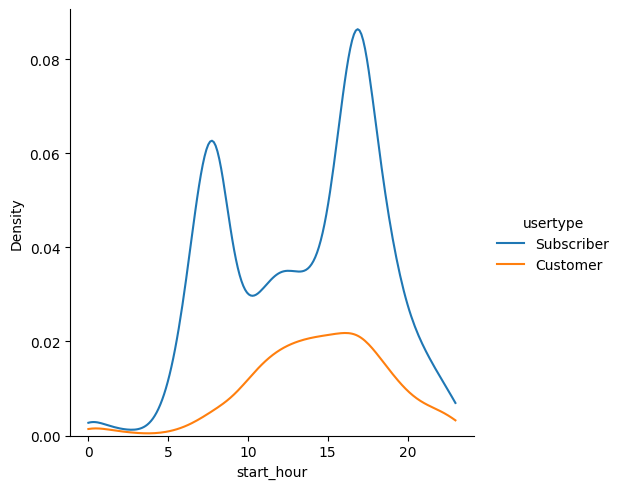

In [189]:
sns.displot(x= 'start_hour', 
            data=data.to_pandas(),  hue='usertype', kind="kde",
           bw_adjust=3, cut=0)

## weekdays

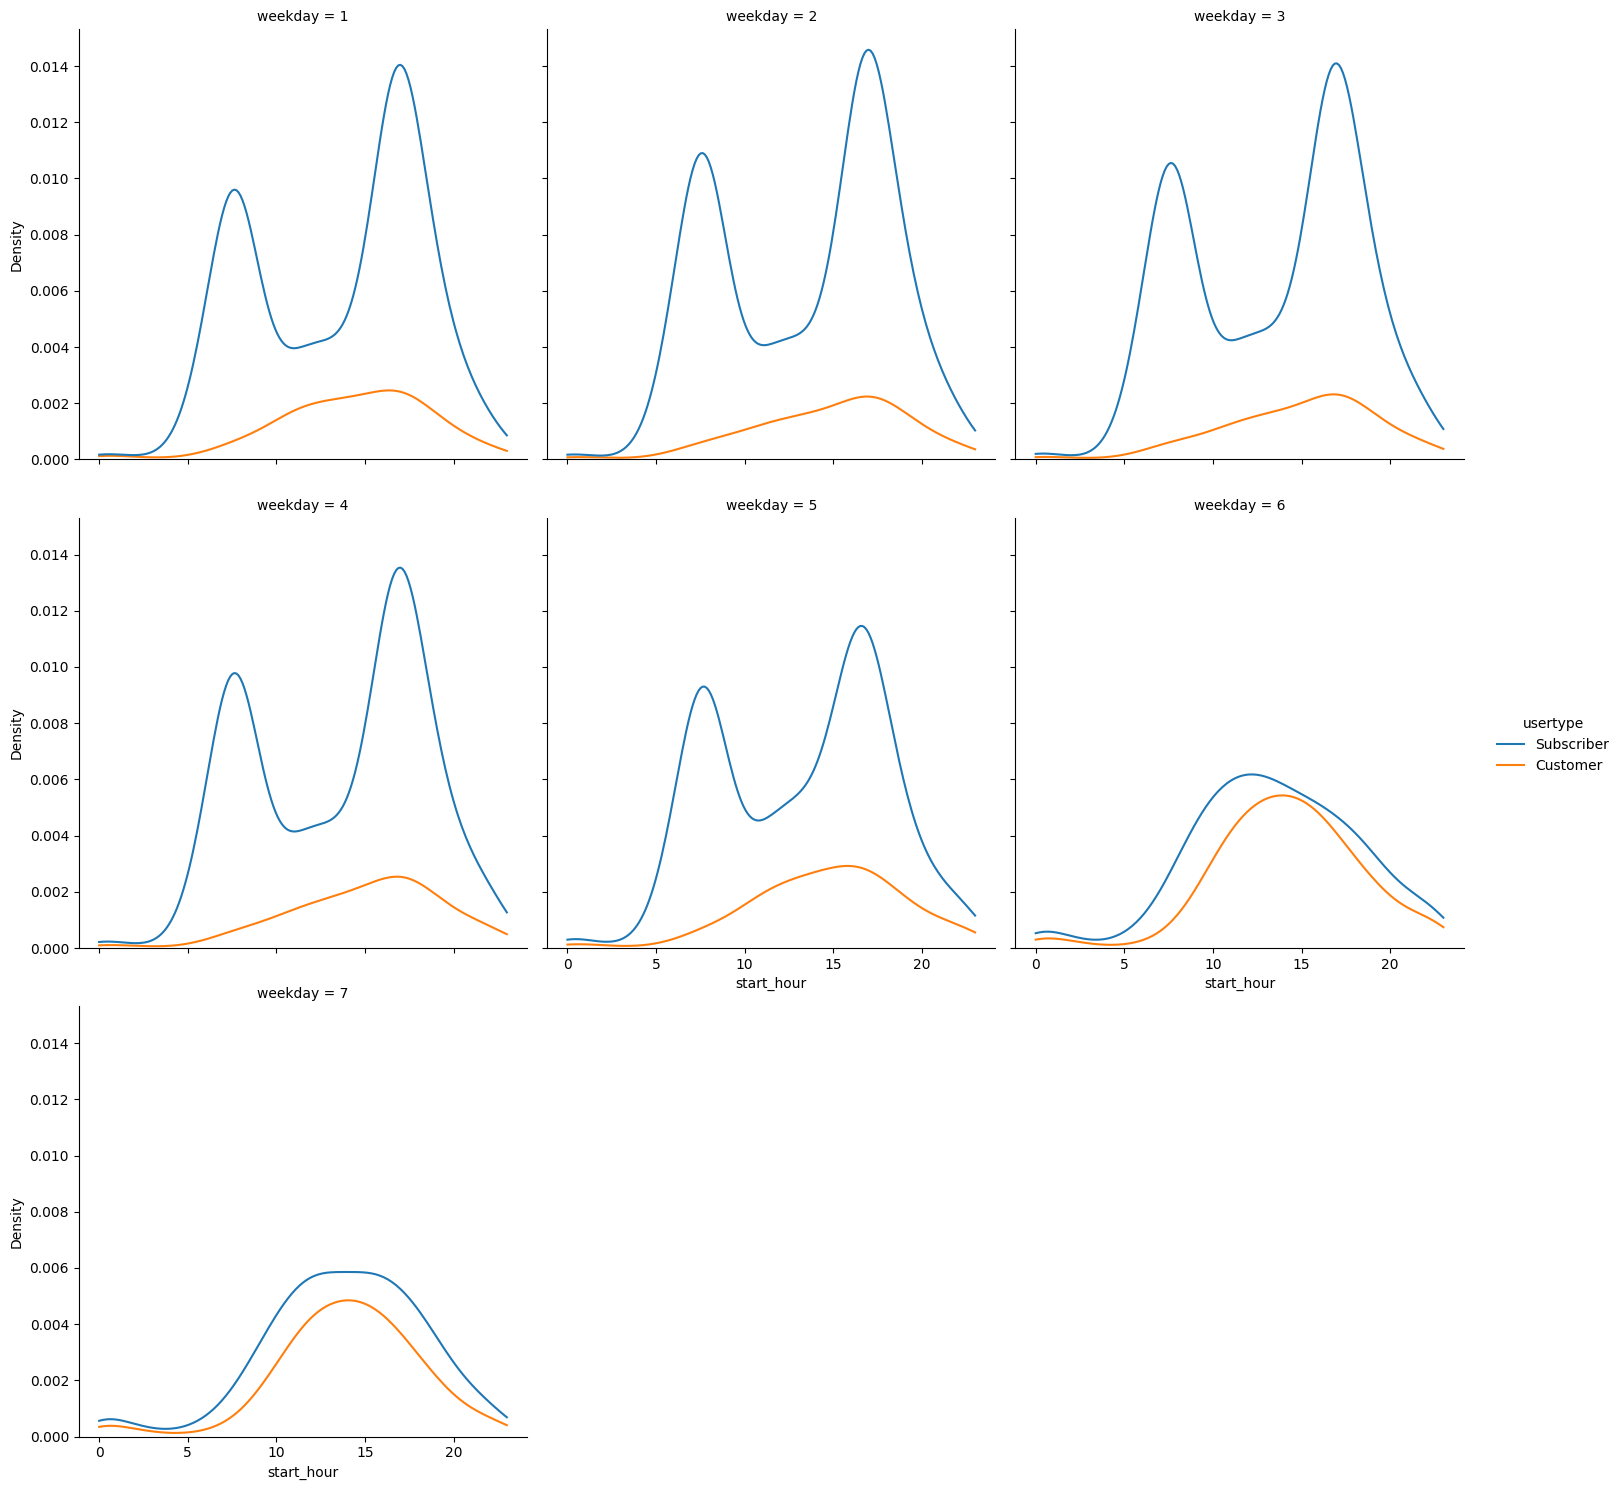

In [278]:
sns.displot (x="start_hour",  hue="usertype", kind='kde', bw_adjust=3, cut=0,  data=data.to_pandas(),
             col='weekday', col_wrap=3)

## stations

### names and ids

We check that there is 1 to 1 correspondance between station_name and station_id

In [197]:
data.groupby('from_station_name').agg(ids=pl.col('from_station_id').n_unique()).sort(by='ids', descending=True).head()

from_station_name,ids
str,u32
"""Dearborn St & …",1
"""Ashland Ave & …",1
"""Laflin St & Cu…",1
"""Rush St & Supe…",1
"""Morgan St & Po…",1


In [198]:
data.groupby('to_station_name').agg(ids=pl.col('to_station_id').n_unique()).sort(by='ids', descending=True).head()

to_station_name,ids
str,u32
"""Paulina Ave & …",1
"""Michigan Ave &…",1
"""Kilbourn Ave &…",1
"""Lincoln Ave & …",1
"""Fort Dearborn …",1


In [201]:
ids = [elem[0] for elem in Counter(data['from_station_name']).most_common(12)]
top_from = data.filter(data['from_station_name'].is_in(ids))

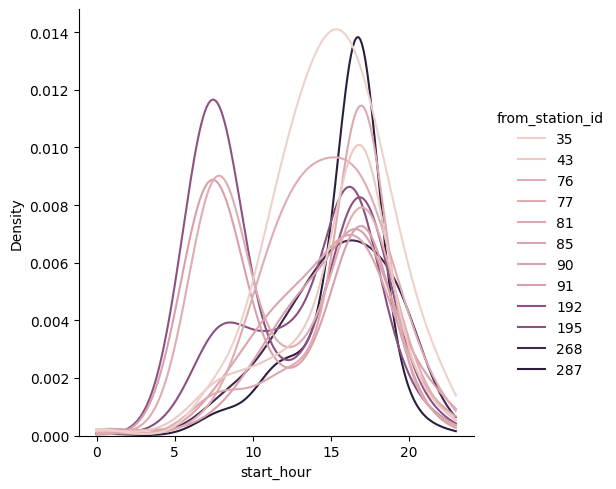

In [202]:
sns.displot(x= 'start_hour', 
            data=top_from.to_pandas(), hue='from_station_id', kind="kde",
           bw_adjust=3, cut=0)

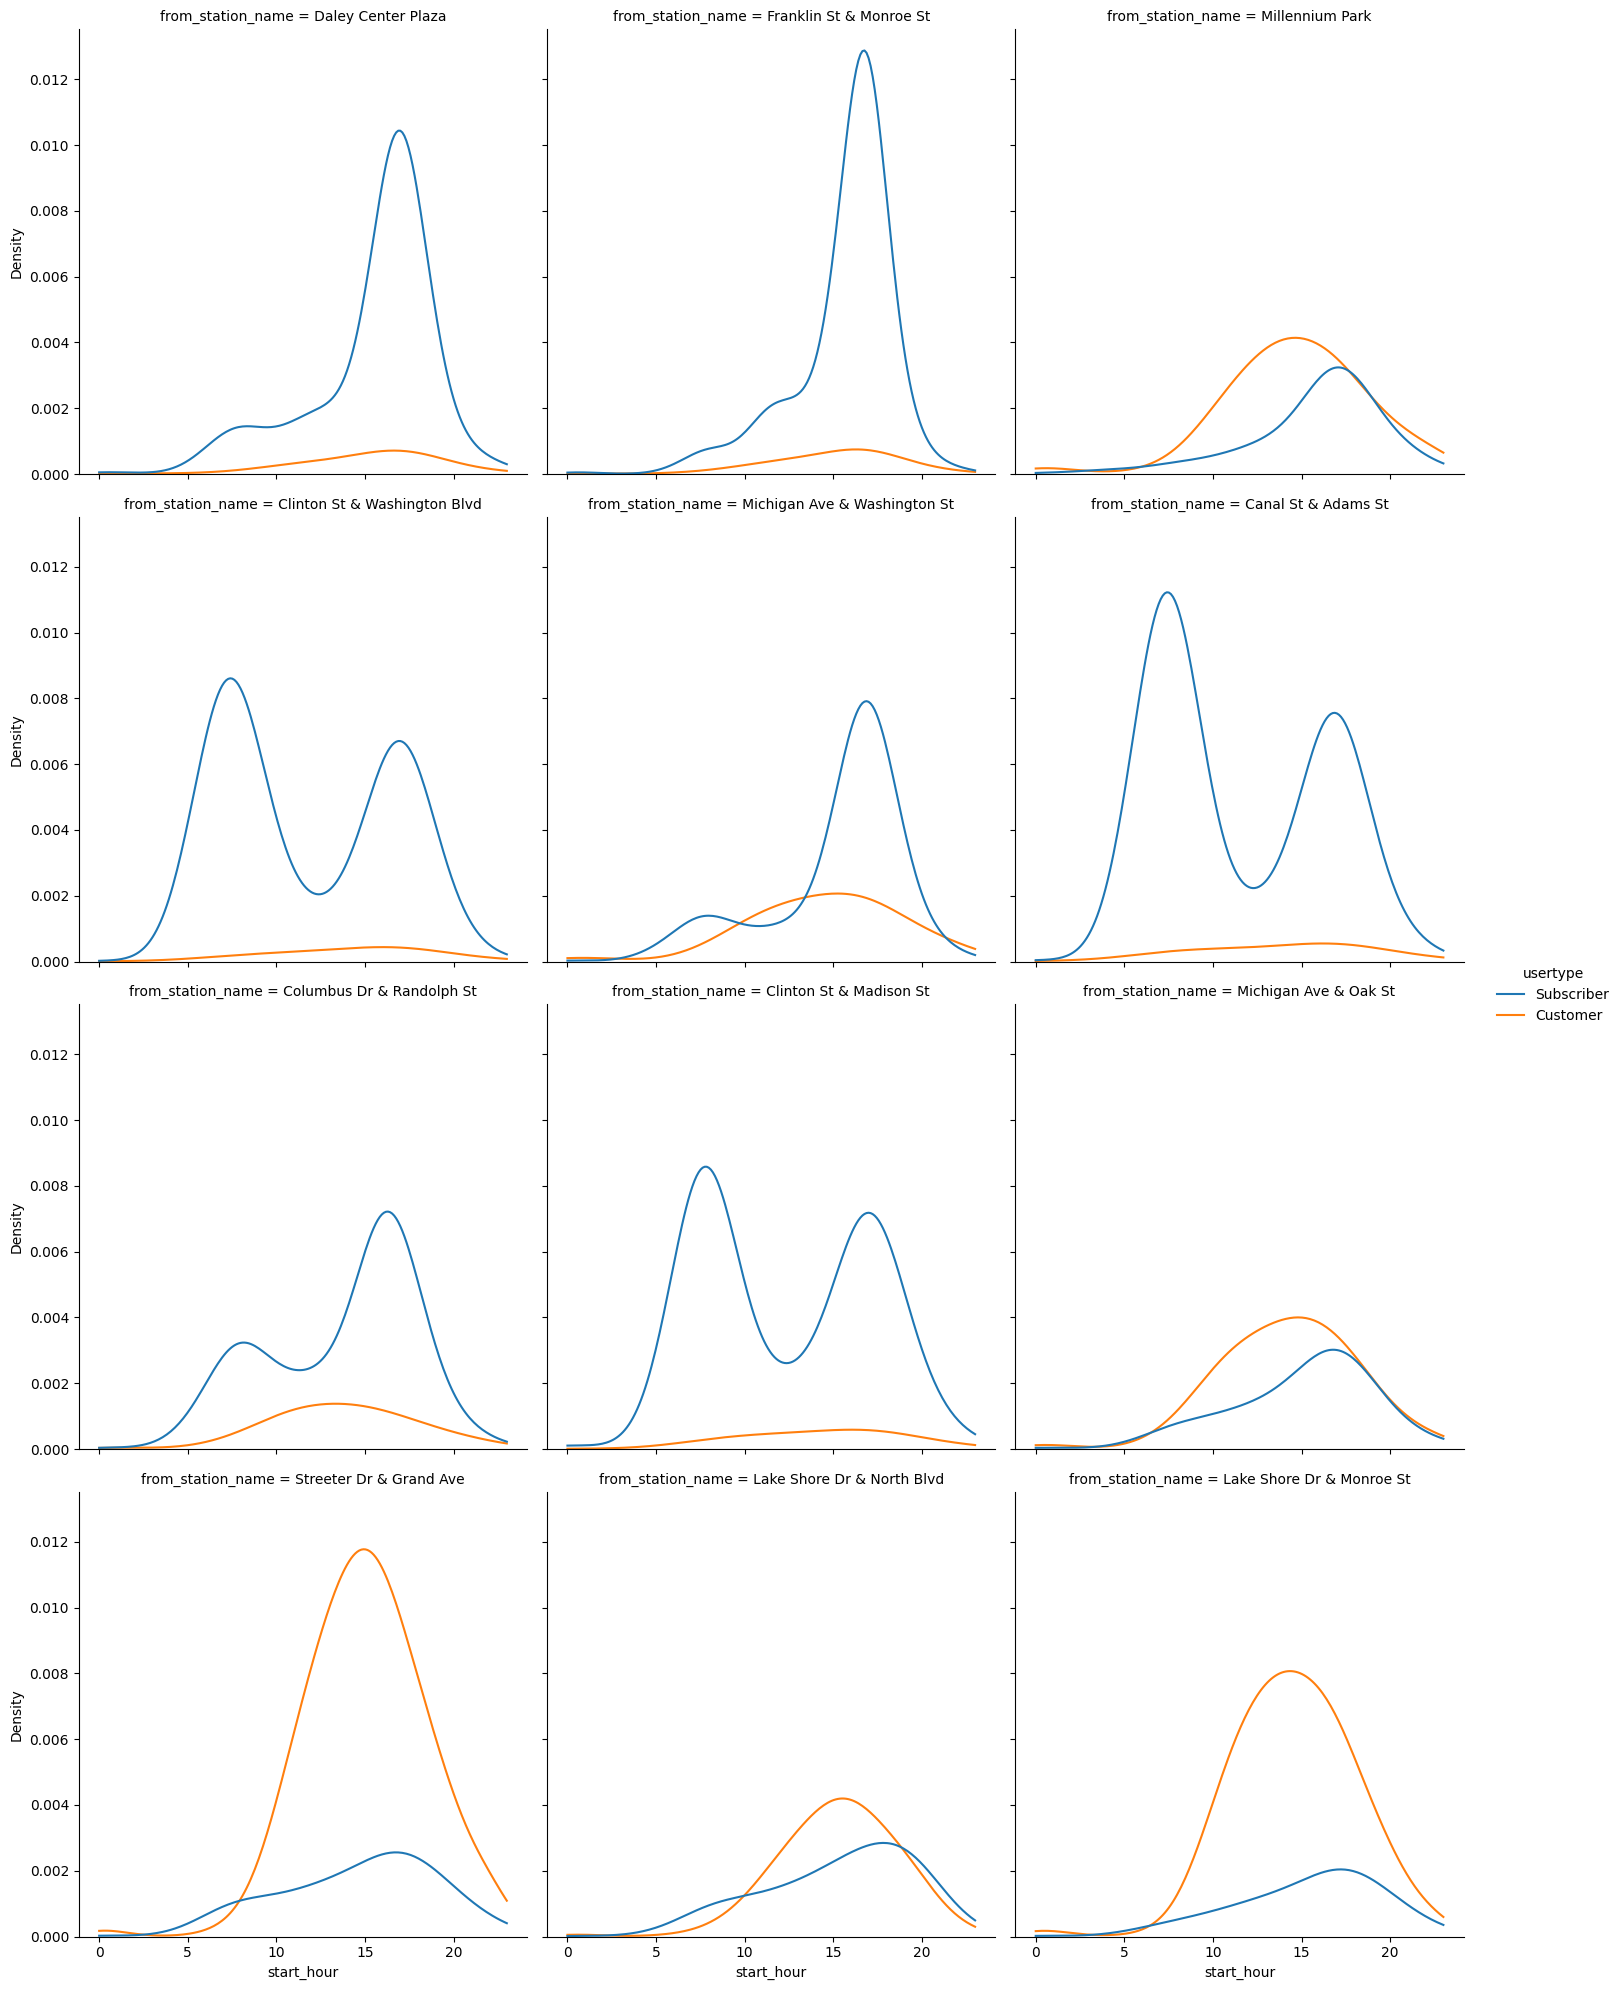

In [203]:
sns.displot (x="start_hour",  hue="usertype", kind='kde', bw_adjust=3, cut=0,  data=top_from,
             col='from_station_name', col_wrap=3)

In [213]:
edges = data.groupby(['from_station_name', 'to_station_name']).agg(pl.count())\
    .rename({'from_station_name':'source', 'to_station_name':'target', 'count': 'value'})

In [272]:
top_edges = edges.sort(by='value',descending=True).head(30)
station_id_to_name = dict(enumerate(list(set(chain.from_iterable([top_edges['source'], top_edges['target']])))))
station_name_to_id =  {value:key for key, value in station_id_to_name.items()}
sorted_list = sorted(list(station_id_to_name.items()), key=lambda x: x[0])

In [273]:
labels = [elem[1] for elem in sorted_list]
source = [station_name_to_id[elem] for elem in top_edges['source']]
target = [station_name_to_id[elem] for elem in top_edges['target']]

In [274]:
fig = go.Figure(data=[go.Sankey(
    arrangement = "snap",
    node = dict(
      pad = 15,
      thickness = 10,
      line = dict(color = "black", width = 0.3),
      label = labels,
      color = "blue"
    ),
    link = dict(source=source,
               target=target,
               value=top_edges['value']))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()